In [274]:
from tqdm import tqdm
from collections import Counter
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

In [1]:
allowed = []
with open("./wordle-allowed-guesses.txt", "r") as f:
    allowed = f.read().split('\n')	

answers = []
with open("./wordle-answers-alphabetical.txt", "r") as f:
    answers = f.read().split('\n')

In [61]:
allowed[50:60]

['accas',
 'accoy',
 'acerb',
 'acers',
 'aceta',
 'achar',
 'ached',
 'aches',
 'achoo',
 'acids']

In [298]:
def score_word(word, guess, entropy=True):
    score = ""
    words_left = set(answers.copy())
    for i, (l1, l2) in enumerate(zip(word, guess)):
        if l1 == l2:
            score += "X"
            words_left = [x for x in words_left if x[i] == l1]
        elif l2 in word:
            score += "O"
            words_left = [x for x in words_left if l1 in x]
        else:
            score += "-"
            words_left = [x for x in words_left if l1 not in x]
    return score, words_left

In [96]:
print(score_word("macho", "manys"))

('XX---', 20)


In [10]:
# {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}

In [126]:
hist = {}
scores = {}
word_paring_dict = {}
for word in tqdm(allowed):
    hist[word] = {}
    word_paring_dict[word] = {}
    scores[word] = 0.0
    for guess in answers:
        card, words_left = score_word(word, guess)
        word_paring_dict[word][guess] = words_left
        hist[word][guess] = card
        scores[word] += len(words_left)
    scores[word] /= len(answers)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10657/10657 [1:20:47<00:00,  2.20it/s]


In [114]:
s = {k:v for k, v in sorted(Counter(hist['aahed'].values()).items(), key=lambda i: i[1], reverse=True)}

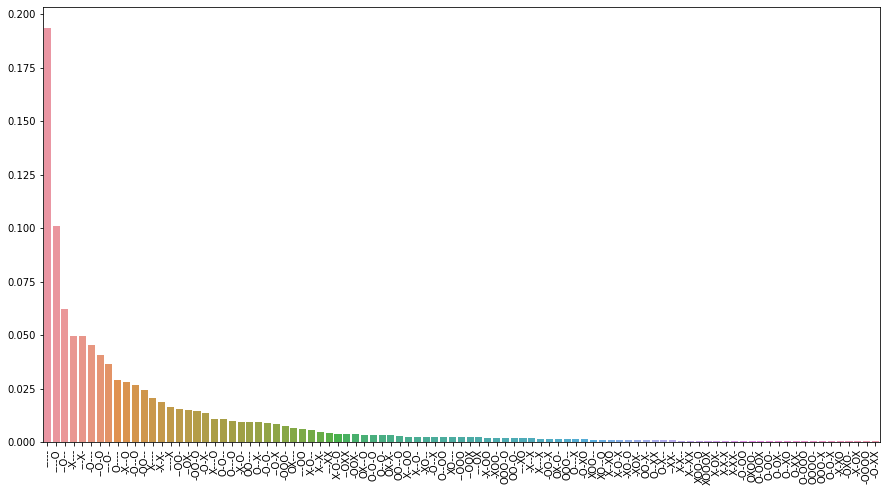

In [115]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x=[x for x in s.keys()], y=[y / len(answers) for y in s.values()])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [263]:
def check_cand(guess, template, candidate):
    """ True if guess and hit/miss template is compatible 
        for a given possible answer candidate """
    for l1, l2, t in zip(guess, candidate, template):
        if l1 == l2 and t != 'X':
            # print((l1, l2), t, (guess, candidate), template, "   l1 == l2 and t != 'X':")
            return False
        if l1 != l2 and t == 'X':
            # print((l1, l2), t, (guess, candidate),template,"   l1 != l2 and t == 'X':")
            return False
        if l1 not in candidate and t == 'O':
            # print((l1, l2), t, (guess, candidate),template,"   l1 not in candidate and t == 'O':")
            return False
        if l1 in candidate and t == '-':
            # print((l1, l2), t, (guess, candidate),template,"   l1 in candidate and t == '-':")
            return False
    return True

def narrow_down(guess, template, words_left=answers.copy()):
    """ Accepts a wordle guess, and the number of words left;
        defaults to all possible words left (for 1st turn) 
        and returns list of remaining possible words """
    return [cand for cand in words_left if check_cand(guess, template, cand)]

In [255]:
def make_template(pred, gold):
    template = ""
    for l1, l2 in zip(pred, gold):
        if l1 == l2:
            template += "X"
        elif l1 in gold:
            template += "O"
        else:
            template += "-"
    return template

In [269]:
g_dict = {}
all_left = allowed_left + answers_left
all_left.sort()
for guess in all_left: # a possible word that is allowed
    gbin[guess] = {}
    for answer in answers_left:  # a potential answer
        template = make_template(guess, answer)
        gbin[guess][template] = narrow_down(guess, template, answers_left)

In [300]:
np.log2(4)

2.0

In [301]:
entropy_bin = []

for guess in gbin:
    # print(guess)
    entropy = 0
    for template in gbin[guess]:
        # print(f".... {template}:  {', '.join(gbin[guess][template])}")
        entropy += np.log2(len(gbin[guess][template]))
    # print(f"Entropy score (higher is worse): {entropy}")
    entropy_bin += [(guess, entropy)]

entropy_bin.sort(key=lambda x: x[1], reverse=True)
best = [x for x in entropy_bin if x[1] == entropy_bin[-1][1]]

# print("Best guess(es): ")
for (guess, entropy_val) in best:
    print(f"* {guess} [{entropy_val}]")

* reccy [1.0]
* recto [1.0]
* ricer [1.0]
* ricey [1.0]


In [154]:
def score_word(word, guess, entropy=True, left=answers):
    score = ""
    words_left = set(left.copy())
    for i, (l1, l2) in enumerate(zip(word, guess)):
        if l1 == l2:
            score += "X"
            words_left = [x for x in words_left if x[i] == l1]
        elif l2 in word:
            score += "O"
            words_left = [x for x in words_left if l1 in x]
        else:
            score += "-"
            words_left = [x for x in words_left if l1 not in x]
    return score, words_left

In [204]:
guess_bin = {}
overall = {}
for guess in narrow:
    guess_bin[guess] = {}
    overall[guess] = 0.0
    for pos in narrow:
        pattern, wo_left = score_word(pos, guess, left=narrow)
        if len(wo_left) == 0:
            continue
        guess_bin[guess][pos] = (pattern, len(wo_left))
        overall[guess] += len(wo_left)

In [ ]:
for word in narrow:
    if l1 == "c" and (l1 == l2 or l1 not in pos):
        good = False
        break
    if l1 == "r" and (l1 == l2 or l1 not in pos):
        print("2")
        good = False
        break
    if l1 == "e" and (l1 == l2 or l1 not in pos):
        print("3")
        good = False
        break
    if good:
        crane_cre_allowed += [pos]